# K Nearest Neighbors Project

Your work on the previous data was good, so you've been given more on which to work your mathemagical powers.

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('whitegrid')
%matplotlib inline

## Data

In [5]:
data = pd.read_csv('KNN-Project-Data.csv')
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [7]:
data.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


## Poking Around

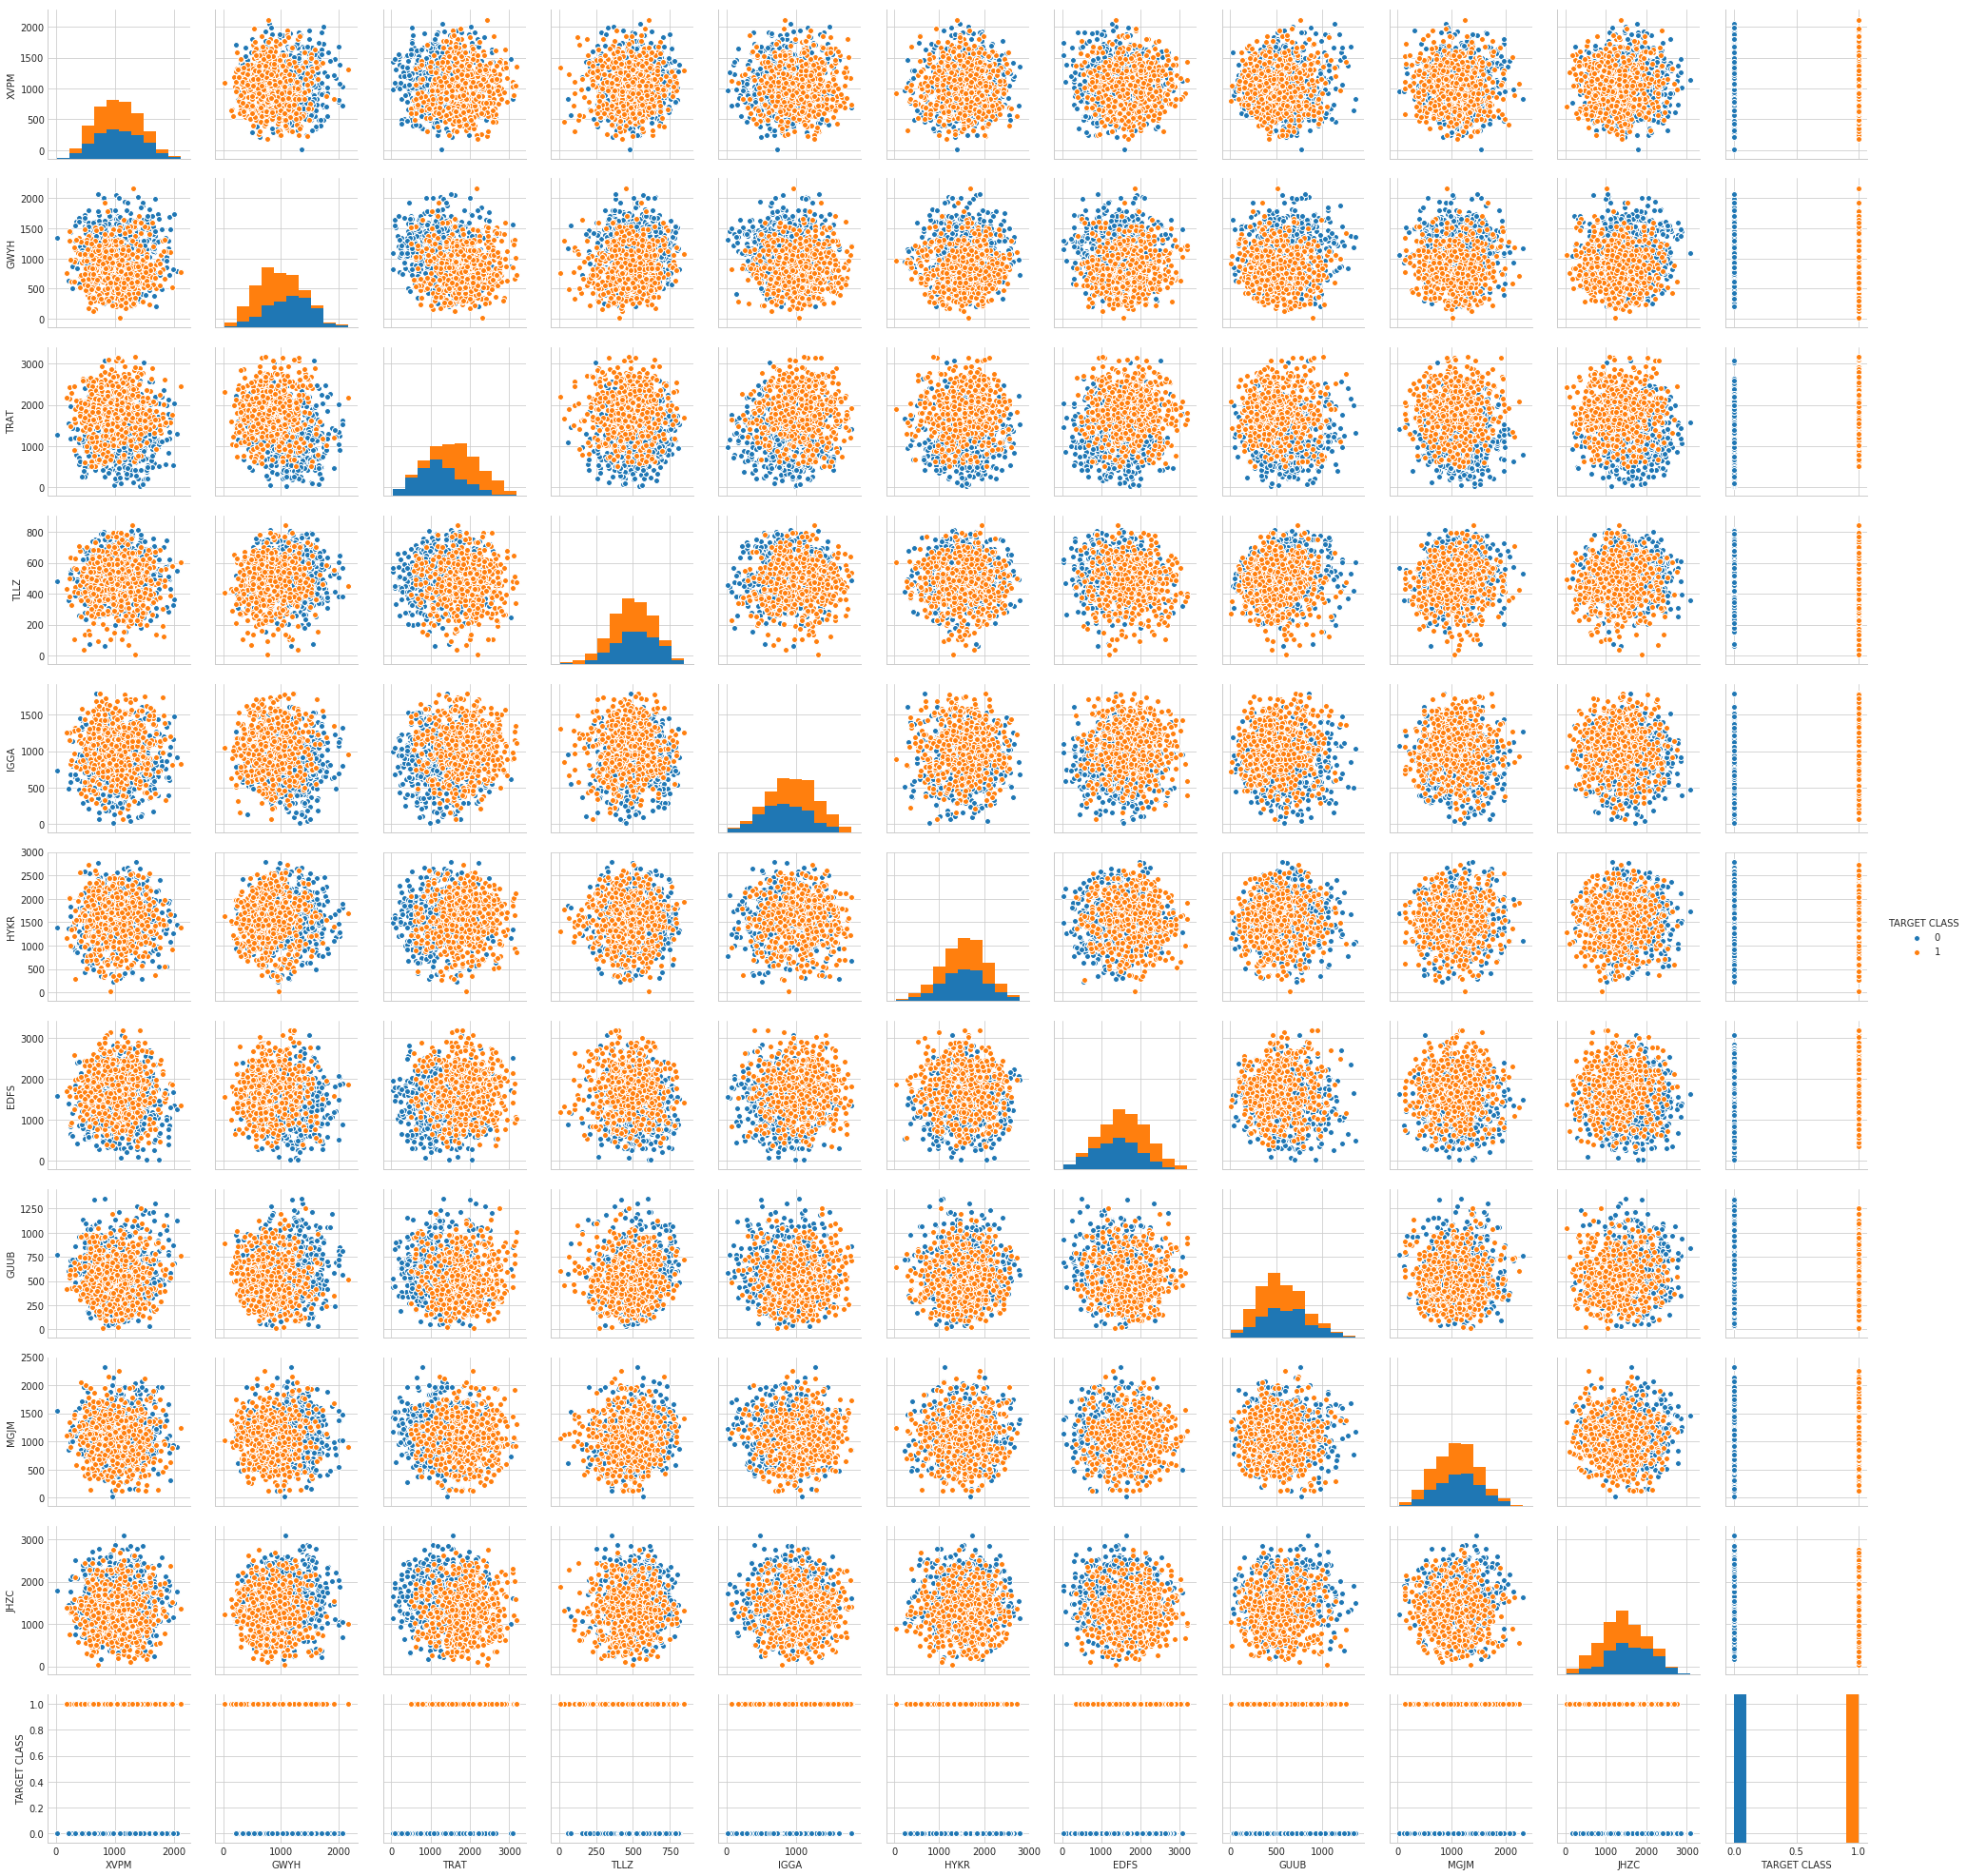

In [8]:
sns.pairplot(data=data, hue='TARGET CLASS')

## Standardization

In [10]:
scaler = StandardScaler()
scaler.fit(data.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(data.drop('TARGET CLASS', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Splitting

In [60]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, data['TARGET CLASS'], test_size=0.3)

## Fitting and Testing

In [61]:
error_rates = []

def knn(k, append_error=False):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    if append_error:
        error_rates.append(np.mean(predictions != y_test))
    return classifier, predictions

In [62]:
for i in range(1, 51):
    knn(i, append_error=True)

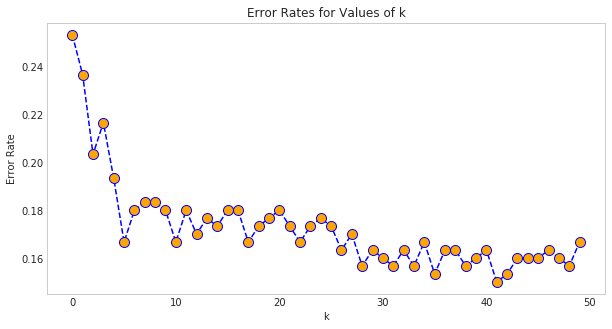

In [67]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(error_rates, linestyle='--', color='b', marker='o', markerfacecolor='orange', markersize=10)
ax.set_title('Error Rates for Values of k')
ax.set_xlabel('k')
ax.set_ylabel('Error Rate')
ax.grid('False')
plt.show()

$k=34$ looks good enough to me.

In [64]:
classifier, predictions = knn(34)

In [65]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[129  22]
 [ 25 124]]
             precision    recall  f1-score   support

          0       0.84      0.85      0.85       151
          1       0.85      0.83      0.84       149

avg / total       0.84      0.84      0.84       300



Not an amazing fit, but pretty good. Perhaps the irreducible error is rather high.